## EXPLORATION 3. 카메라 스티커앱 만들기 첫걸음

## 1. 내 사진을 활용하여 스티커 부착

rectangles[[(182, 96) (311, 225)]]


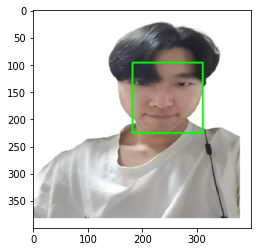

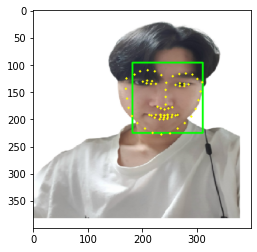

(243, 173)
(x,y) : (243,108)
(w,h) : (130,130)
(130, 130, 3)
(x,y) : (178,102)
(x,y) : (178,102)


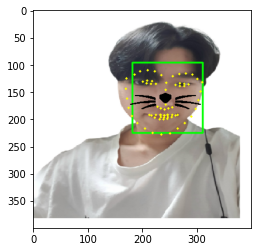

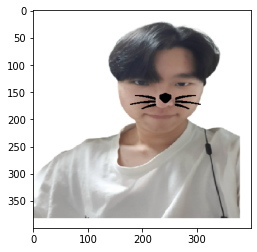

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
# 필요한 모듈 불러오기

my_image_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/image1.png' # 이미지 불러오기
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (400, 400))     # 이미지 사이즈 조정
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # 흑백사진 컬러 변환
# plt.imshow(img_bgr)  # 이미지 표시
plt.show()  


detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 (sliding window로 얼굴 위치 찾는 함수)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)  바운딩 박스 추출

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


model_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) # landmark 모델 불러오기

list_landmarks = []
for dlib_rect in dlib_rects:  # tuple (x, y) 68개로 이루어진 리스트를 생성
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) 

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # 노란색 얼굴 기준선 출력
plt.imshow(img_show_rgb)
plt.show()


x = 0  
y = 0
w = 0
h = 0

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):     # 코의 중심점 좌표
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))  #스티커 위치와 크기 코의 중심좌표 이용
  
    
sticker_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/cat-whiskers.png'  # 야옹이 수염 계산한 크기 resize
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

refined_x = x    - w // 2  # left
refined_y = y    - int(h * 0.05)   # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 


if refined_y < 0:
    img_sticker = img_sticker[-refined_y:] 
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))  # 원본 이미지에 스티커 적용

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] 
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker!=0).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))   # 결과 출력
plt.show()

sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]  
# bounding box와 landmark를 제거
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker!=0).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 2.사람이 두명일때

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/2image.png' # 이미지 불러오기
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (400, 400))     # 이미지 사이즈 조정
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # 흑백사진 컬러 변환
# plt.imshow(img_bgr)  # 이미지 표시
plt.show()  


rectangles[[(218, 133) (373, 288)], [(29, 116) (184, 270)]]


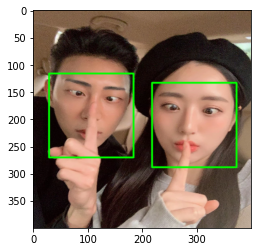

In [10]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 (sliding window로 얼굴 위치 찾는 함수)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)  바운딩 박스 추출

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

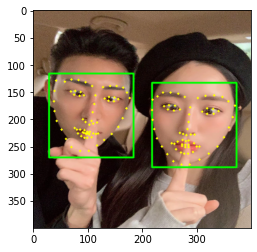

In [11]:
model_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:  # tuple (x, y) 68개로 이루어진 리스트를 생성
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for i in range(len(list_landmarks)):
        for idx, point in enumerate(list_landmarks[i]):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # 기준선 출력
plt.imshow(img_show_rgb)
plt.show()


(156, 156, 3)


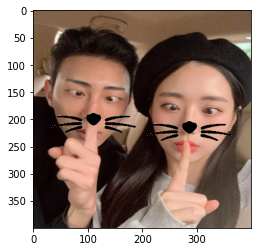

In [12]:
# (w,h) 스티커의 크기는 for문과 무관하므로 미리 변수를 정리 했지만 ...

w = dlib_rect.width()
h = dlib_rect.width()

# 스티커를 위에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/cat-whiskers.png'  # 야옹이 수염 계산한 크기 resize
img_sticker = cv2.imread(sticker_path) # sticker_path 그대로 사용
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
 # 얼굴 사이즈가 비슷비슷해서 이렇게 하긴 했는데
 # 원래는 for문 안에 들어가서 얼굴마다 스티커 사이즈가 달라야 하는것 아닌가 싶다

# 얼굴마다 스티커 붙여주기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    refined_x = int(x - w//2.1)      # left
    y = landmark[30][1]
    refined_y = int(y - w//2.1)      # top

# bounding box와 landmark가 없는 원본을 불러와서 바로 최종 결과만 출력
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 3. 사람이 여러명일때

rectangles[[(377, 46) (439, 108)], [(187, 153) (239, 205)], [(342, 135) (405, 198)], [(266, 122) (328, 184)], [(210, 32) (262, 84)], [(418, 135) (481, 198)], [(349, 253) (411, 315)], [(176, 253) (239, 315)], [(89, 141) (141, 193)]]


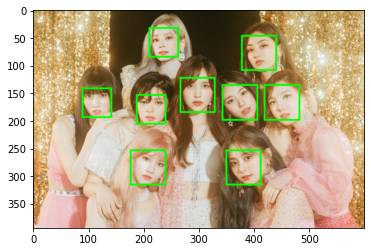

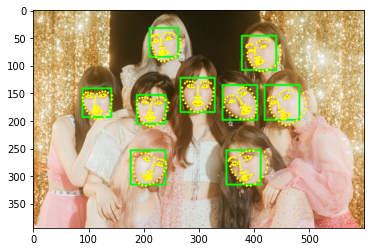

(53, 53, 3)


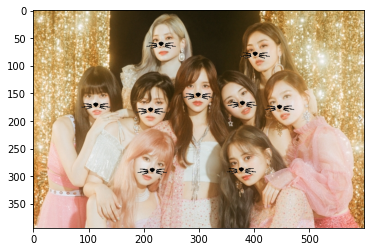

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/twice_image.png' # 이미지 불러오기
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
# img_bgr = cv2.resize(img_bgr, (400, 400))     # 이미지 사이즈 조정
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # 흑백사진 컬러 변환
# plt.imshow(img_bgr)  # 이미지 표시
plt.show()  

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 (sliding window로 얼굴 위치 찾는 함수)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)  바운딩 박스 추출

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:  # tuple (x, y) 68개로 이루어진 리스트를 생성
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for i in range(len(list_landmarks)):
        for idx, point in enumerate(list_landmarks[i]):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # 기준선 출력
plt.imshow(img_show_rgb)
plt.show()

# (w,h) 스티커의 크기는 for문과 무관하므로 미리 변수를 정리 했지만 ...

w = dlib_rect.width()
h = dlib_rect.width()

# 스티커를 위에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/cat-whiskers.png'  # 야옹이 수염 계산한 크기 resize
img_sticker = cv2.imread(sticker_path) # sticker_path 그대로 사용
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
 # 얼굴 사이즈가 비슷비슷해서 이렇게 하긴 했는데
 # 원래는 for문 안에 들어가서 얼굴마다 스티커 사이즈가 달라야 하는것 아닌가 싶다

# 얼굴마다 스티커 붙여주기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    refined_x = int(x - w//2.1)      # left
    y = landmark[30][1]
    refined_y = int(y - w//2.1)      # top

# bounding box와 landmark가 없는 원본을 불러와서 바로 최종 결과만 출력
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 4. 사진이 어두울때

rectangles[[(81, 24) (210, 153)]]


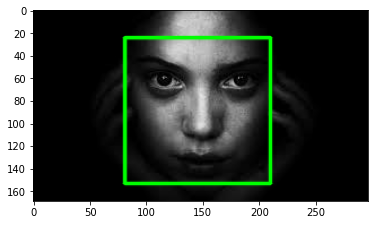

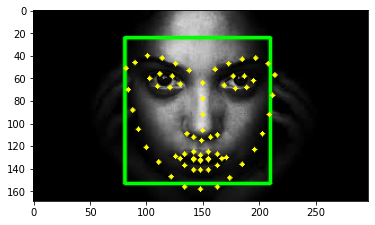

(130, 130, 3)


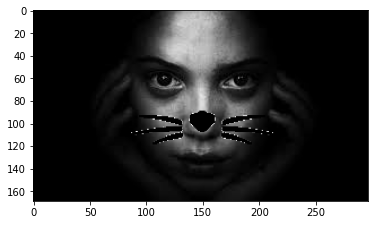

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/dark_image1.png' # 이미지 불러오기
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
# img_bgr = cv2.resize(img_bgr, (400, 400))     # 이미지 사이즈 조정
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # 흑백사진 컬러 변환
# plt.imshow(img_bgr)  # 이미지 표시
plt.show()  

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 (sliding window로 얼굴 위치 찾는 함수)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)  바운딩 박스 추출

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:  # tuple (x, y) 68개로 이루어진 리스트를 생성
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for i in range(len(list_landmarks)):
        for idx, point in enumerate(list_landmarks[i]):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # 기준선 출력
plt.imshow(img_show_rgb)
plt.show()

# (w,h) 스티커의 크기는 for문과 무관하므로 미리 변수를 정리 했지만 ...

w = dlib_rect.width()
h = dlib_rect.width()

# 스티커를 위에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/cat-whiskers.png'  # 야옹이 수염 계산한 크기 resize
img_sticker = cv2.imread(sticker_path) # sticker_path 그대로 사용
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
 # 얼굴 사이즈가 비슷비슷해서 이렇게 하긴 했는데
 # 원래는 for문 안에 들어가서 얼굴마다 스티커 사이즈가 달라야 하는것 아닌가 싶다

# 얼굴마다 스티커 붙여주기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    refined_x = int(x - w//2)      # left
    y = landmark[30][1]
    refined_y = int(y - w//2-2)      # top

# bounding box와 landmark가 없는 원본을 불러와서 바로 최종 결과만 출력
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


## 5. 옆모습일 경우

rectangles[[(439, 242) (662, 464)]]


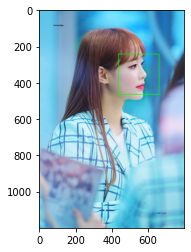

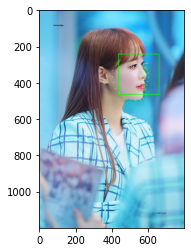

(224, 224, 3)


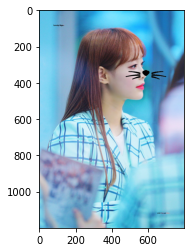

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/chu_image.jpg' # 이미지 불러오기
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
# img_bgr = cv2.resize(img_bgr, (400, 400))     # 이미지 사이즈 조정
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # 흑백사진 컬러 변환
# plt.imshow(img_bgr)  # 이미지 표시
plt.show()  

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 (sliding window로 얼굴 위치 찾는 함수)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)  바운딩 박스 추출

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:  # tuple (x, y) 68개로 이루어진 리스트를 생성
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for i in range(len(list_landmarks)):
        for idx, point in enumerate(list_landmarks[i]):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # 기준선 출력
plt.imshow(img_show_rgb)
plt.show()

# (w,h) 스티커의 크기는 for문과 무관하므로 미리 변수를 정리 했지만 ...

w = dlib_rect.width()
h = dlib_rect.width()

# 스티커를 위에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/cat-whiskers.png'  # 야옹이 수염 계산한 크기 resize
img_sticker = cv2.imread(sticker_path) # sticker_path 그대로 사용
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
 # 얼굴 사이즈가 비슷비슷해서 이렇게 하긴 했는데
 # 원래는 for문 안에 들어가서 얼굴마다 스티커 사이즈가 달라야 하는것 아닌가 싶다

# 얼굴마다 스티커 붙여주기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    refined_x = int(x - w//2)      # left
    y = landmark[30][1]
    refined_y = int(y - w//2-2)      # top

# bounding box와 landmark가 없는 원본을 불러와서 바로 최종 결과만 출력
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


- 옆모습에 경우 스티커를 조정해야 자연스럽게 보일 것 같다.

## 6. 멀리있는 사람 인식

rectangles[[(522, 350) (584, 412)]]


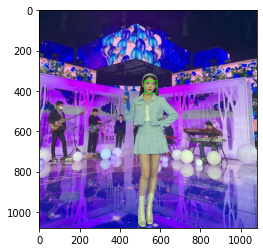

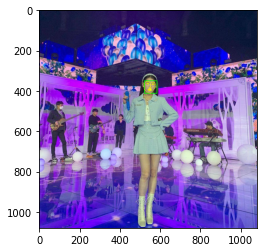

(63, 63, 3)


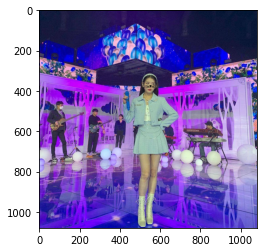

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/iu_image.png' # 이미지 불러오기
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
# img_bgr = cv2.resize(img_bgr, (400, 400))     # 이미지 사이즈 조정
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # 흑백사진 컬러 변환
# plt.imshow(img_bgr)  # 이미지 표시
plt.show()  

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 (sliding window로 얼굴 위치 찾는 함수)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)  바운딩 박스 추출

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:  # tuple (x, y) 68개로 이루어진 리스트를 생성
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for i in range(len(list_landmarks)):
        for idx, point in enumerate(list_landmarks[i]):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # 기준선 출력
plt.imshow(img_show_rgb)
plt.show()

# (w,h) 스티커의 크기는 for문과 무관하므로 미리 변수를 정리 했지만 ...

w = dlib_rect.width()
h = dlib_rect.width()

# 스티커를 위에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/exploration/E-03/camera_sticker/images/cat-whiskers.png'  # 야옹이 수염 계산한 크기 resize
img_sticker = cv2.imread(sticker_path) # sticker_path 그대로 사용
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
 # 얼굴 사이즈가 비슷비슷해서 이렇게 하긴 했는데
 
# 얼굴마다 스티커 붙여주기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    refined_x = int(x - w//2)      # left
    y = landmark[30][1]
    refined_y = int(y - w//2-2)      # top

# bounding box와 landmark가 없는 원본을 불러와서 바로 최종 결과만 출력
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


- 프로젝트 평가 :

    여러가지 다양한 사진을 활용하여 고양이 수염을 적용해보았습니다
    명도가 낮은 사진이나 멀리있는 얼굴에 경우에도 정상적으로 인식이 되어
    부착되는것이 확인되었습니다. 다른 사진을 시도해 보았으나 명도가 너무 
    어둡거나 사진 리사이즈 크기 조정이 이상할시 얼굴 인식이 안되는것을 
    확인하여 리사이즈를 안하고 적용을 해보았습니다. 옆모습에 경우 수염에
    축을 바꾸면 될 것 같았으나 능력이 부족하여 거기까지는 하지 못하여서
    아쉬웠습니다.